In [41]:
%matplotlib inline
import os
import sys
import random
import math 
import numpy as np
import skimage.io
import matplotlib
from skimage.measure import find_contours
import matplotlib.pyplot as plt
from matplotlib import patches,  lines
from matplotlib.patches import Polygon
import cv2

In [2]:
ROOT_DIR = os.path.abspath("../")
print(ROOT_DIR)

/home/omm/WorkStuff/Mask_RCNN


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sys.path.append(ROOT_DIR)

In [5]:
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

Using TensorFlow backend.


In [6]:
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))

In [7]:
import coco

In [8]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

In [9]:
print(COCO_MODEL_PATH)

mask_rcnn_coco.h5


In [10]:
IMAGE_DIR = os.path.join(ROOT_DIR, "images")


In [15]:
print(IMAGE_DIR)

/home/omm/WorkStuff/Mask_RCNN/images


In [16]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

In [17]:
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [18]:
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)
model.load_weights('mask_rcnn_coco.h5', by_name=True)

In [19]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [20]:
image = cv2.imread('/home/omm/Downloads/group2.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [23]:
skimage.io.imshow(image)


In [24]:
import time

In [29]:
start = time.time()
results = model.detect([image], verbose=1)
end = time.time()

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [31]:
print(end-start)

7.021062135696411


In [32]:
r = results[0]


In [33]:
y = r['masks'].shape
height = y[0]
width = y[1]

In [34]:
wImage = np.zeros([height, width, 3], dtype=np.uint8)
wImage.fill(255)
plt.imshow(wImage)

bImage = np.zeros([height, width, 3], dtype=np.uint8)
plt.imshow(bImage)

In [35]:
import cv2


In [36]:
def apply_mask(image,masks):
    
    n=masks.shape[2]
    image.fill(0)
    
    for i in range(n):
        mask = masks[:,:,i]
        image[:,:,0] = np.where(mask==1,
                            (image[:,:,0] * 0) + 255,
                            image[:,:,0])
        image[:,:,1] = np.where(mask==1,
                            (image[:,:,1] * 0) + 255,
                            image[:,:,1])
        image[:,:,2] = np.where(mask==1,
                            (image[:,:,2] * 0) + 255,
                            image[:,:,2])
    
    
    return image


In [37]:
img = apply_mask(image, r['masks'])

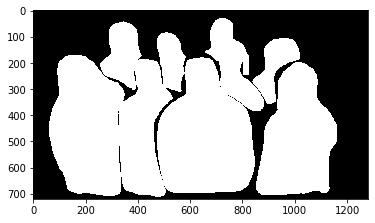

In [42]:
plt.imshow(img)

In [31]:
input_video = 'Raw Video- The President Takes a Surprise Walk.mp4' 
capture = cv2.VideoCapture(input_video)

fps = 25.0
width = int(capture.get(3))
height = int(capture.get(4))
fcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')
out = cv2.VideoWriter("new_video.avi", fcc, fps, (width, height))

while True: 
    ret, frame = capture.read()
    results = model.detect([frame], verbose=0)
    r = results[0]
    frame = apply_mask(frame,
                r['masks'])
                        

    out.write(frame)

    
    

capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 